# Predicting Customer Churn: SyriaTel Telecommunications

A predictive classification model by Chum Mapa, Adam Roth and Leana Critchell.

## Setting the Scene:

This project aims to provide SyriaTel with a model to help predict whether a customer will soon churn.  Current data shows a 15% churn rate in customers who have been with the company for less than 245 days.  For this reason, we hope to provide insights into the driving features that predict churn in order to help SyriaTel be more informed about where to direct retention budget funds. 

## Aims:

This project aims to:
- Investigate labeled data on 3333 customers who have held accounts with the company for less than 243 days.
- Provide inferential statistics and visualisations based on this data.
- Create predictive, supervised learning models from the data to predict churn

## Definitions:

- Churn:  a customer who closes their account with SyriaTel.  A prediction of `True` relates to a customer who will churn. 
- Predictive model:  

## Data:

This project utilises data from the [Churn in Telecom dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset) from Kaggle.

The target variable in this dataset that we aimed to predict was identified as the `churn` column.  

The features of this dataset include locational information (`state` and `area_code`) as well as plan details such as call minutes, charges, customer services calls and whether the customer had an international plan and/or voice mail plan.  Our model iterations utilised subsets of these features as well as aggregations of these features to determine which features would best predict cusomter churn.  

The raw, csv dataset can be downloaded directly from the [kaggle website](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset) or can be found in this repo [here](../../data/raw/telecom_churn_data).

## Model:

This project tests a variety of classification models including:
- Decisioin Tree Classifier
- Logistic Regression Classifier
- KNN Classifier
- Random Forest Classifer
- Gradient Boost Classifer

We evaluated our models based on the recall score metric as well as the corresponding confusion matrix.  Once the best model was identified, we assessed the model performance on a seperate test set to determine whether the model continued to perform well or if the model was overfitting.

The decision behind choosing to evaluate the model on recall was made by considering the cost and impact of false negative predictions, that is, we determined that it was more costly for the company for the model to predict that a customer would stay with SyriaTel when in fact that would churn/leave.  This would lead to a missed opportunity for the company to dedicate retention resources towards that customer and keeping their business.  Maximising recall score accounts for this scenario in our model and so it was for this reason that we chose this as our evaluation metric. 

# Table of contents:
- Data Cleaning and Exploratory Data Analysis (EDA)
- Investigate Target Variable: Churn 
- Investigate Features
- First Simple Model:  Decision Tree Classifier
- Model Iterations 1 - 6
- Model interpretation
- Conclusion

## Results, Future Investigations and Recommendations:

#### Best model:  

Gradient boost, blah blah

#### Future Investigations and Recommendations:
- Further investigation should be devoted to looking into the other characteristics of these customers to find out why there was a need to make this many calls to customer service and how the company could better assist these customers.
- Given that over 42% of international plan holders churn, further investigation into retention efforts for these customers might be a worthwhile effort. 
- Further investigation should be done to see what is going on in these high churn states to see what trends might be causing this.
- Investigate ways to incentivise customers with total day charges over $55 to stay with with the company by creating added value and perks.  This investigation found that 100% of these customers churn.

# Data Cleaning and Exploratory Data Analysis:

In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [203]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gp
sns.set_style('darkgrid')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import modelling_lc as m

## Get the Data

As mentioned earlier, the dataset can be downloaded directly from the Kaggle website [here](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset) and saved into your desired directory, or, if copying the repo structure here, you can run the following cells to load the data from the `telecom_churn_data` csv file in the [raw data folder](../../data/raw) in this repo.

In [204]:
# read in data to pandas
df = pd.read_csv('../../data/raw/telecom_churn_data')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data Cleaning

#### Clean up column headings:

In [205]:
# replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

#### Inspect null values and data types:

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account_length            3333 non-null int64
area_code                 3333 non-null int64
phone_number              3333 non-null object
international_plan        3333 non-null object
voice_mail_plan           3333 non-null object
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_day_charge          3333 non-null float64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_eve_charge          3333 non-null float64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_night_charge        3333 non-null float64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
total_intl_charge         3333 non-null float64

It appears we have no null values in our dataframe (although it is not yet known whether we have any 'disguised' null values yet).  

Most of the features are numerical except for `state`, `phone_number`, `international_plan` and `voice_mail_plan` which are strings and our target `churn` which is of boolean type.  

Let's inspect the unique values of each feature to see if we have any 'null' values 'in disguise' or any values that we don't expect which might be errors:

In [207]:
# inspect unique values of columns to identify potention errors or null values:
for col in df.columns:
    print(f"{col} vals:  {df[col].unique()} \n")

state vals:  ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

account_length vals:  [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 1

No values of surprise or suspision here.  
- All `states` look normal, as expected.
- We can see that columns `international_plan` and `voice_mail_plan` are binary features with `yes/no` values - we might want to change these types later to booleans or 1/0's.  
- It is interesting to see that there are only 3 `area_codes`.  It might be worth investigating whether a particular area code has higher churn than another or if it would be safe to simply drop area code.  Also, area code would actually be more of a categorical feature rather than an `int` feature so we will change this data type. 
- It would be safe to assume that `phone_number` has no bearing on whether a person decides to leave the company and so we might choose to drop this column. 
- `account_length` appears to be discrete, with only integer values.  The highest value being 243 suggests that this column represents the total number of days the cusomter has had their account open with the company.  From the length of time, this dataset must contain relatively new cusomters.
- `number_vmail_messages` appears to be a discrete variable and there aren't abnormal values here.  The highest number of voicemails is 51 which might be high for the average person but could be an indicator of churn so I feel it is worth keeping. 
- `customer_service_calls vals` is also a discrete variable as expected with no apparent abnormal values. 
- All minutes, calls and charges columns have reasonable values and nothing stands out as unusual at this stage. 
- And of course our target `churn` has just `True/False` values as expected. 

#### Inspect range and central tendencies of numeric data:

In [208]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


All values still seem reasonable and no reason to suggest outliers amongst the features yet. 

### Drop irrelevant features:

As mentioned above, it is unlikely that phone number bears any weight in predicting churn, so we drop it from our dataset:

In [209]:
df.drop('phone_number', axis = 1, inplace = True)

### Explore Features:

#### Area Code:

Since there were only 3 area codes, it would be interesting to see if there is significant churn within a particular area code or if this column could be dropped from our dataframe.

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


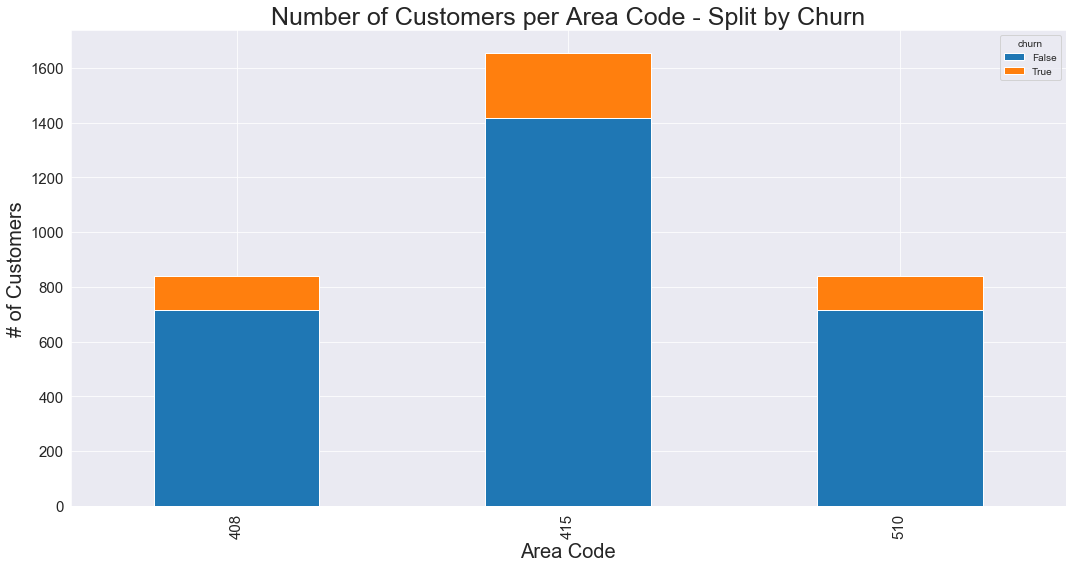

In [210]:
# percentage of churn by area code
print(df.groupby(["area_code"])['churn'].mean())

fig, ax = plt.subplots(figsize = (15, 8))
df.groupby(['area_code', 'churn']).size().unstack().plot(kind='bar', stacked=True, ax = ax);
plt.title('Number of Customers per Area Code - Split by Churn', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Area Code', fontsize = 20)
plt.ylabel('# of Customers', fontsize = 20)
plt.tight_layout()
plt.savefig('figures/cust_area_code.png')

We can see here that customer churn is a consistent rate of roughly 14-15% across all three area codes.  Area code 415 has the highest number of customers but still churns the same rate as the other two area codes.  For this reason, we choose to drop area code from our dataset.

In [211]:
df.drop('area_code', axis = 1, inplace = True)

#### Minutes, Charge, Calls

It would be safe to assume that minutes/charge/calls columns will probably be related somehow so we inspect their correlation.  We might eventually choose to aggregate some of these features during our modelling process but for our first model we will leave them as is.

In [212]:
to_drop = ['state', 'account_length', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'customer_service_calls', 'churn']

In [213]:
# create df of mins/charge/calls variables to see correlations
mins_calls_charge = df.drop(to_drop, axis = 1)
mins_calls_charge.head()

,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [214]:
# see correlation matrix
mins_calls_charge.corr()

,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
total_day_minutes,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092
total_day_calls,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666
total_day_charge,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094
total_eve_minutes,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067
total_eve_calls,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674
total_eve_charge,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074
total_night_minutes,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180
total_night_calls,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630
total_night_charge,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186
total_intl_minutes,-0.010155,0.021565,-0.010157,-0.011035,0.008703,-0.011043,-0.015207,-0.013605,-0.015214,1.000000,0.032304,0.999993


You can see here that all `*_minutes` and `*_charge` features are perfectly correlated (r = 1).  This is to be expected since charge is usually based on minutes.  For this reason, we may not need to include both the charge and minutes columns, but rather choose just one.  We might also choose to aggregate all the day/eve/night columns into one 'total' column.  As mentioned earlier, for a first simple model, we will leave the features as is, but for later iterations we might choose to aggregate and drop these.  

#### International Plan

Let's first change `international_plan` into 1's and 0's for easy binary coding. 

1 will represent that the person has an international plan, while 0 will represent not having an international plan. 

In [215]:
df.international_plan.replace(('yes', 'no'), (1, 0), inplace = True)

#### Voicemail Plan

Let's do the same for the `voice_mail_plan` column:

In [216]:
df.voice_mail_plan.replace(('yes', 'no'), (1, 0), inplace = True)

#### View Current Dataframe:

In [217]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Explore Target Variable: `churn`

## Prepare Data for Modelling

### Create X, y variables:

In [218]:
# create X:
X = df.drop('churn', axis = 1)

# create y:
y = df.churn

### Train, Test, Split

We first split our data into trainig and test sets.  The test set will be saved for our final, best model to test our model on.  We will create a secondary split of our training set for model iteration validation within our modelling helper function.

In [219]:
# initial split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### One Hot Encode `state`

First, we need to dummy out our state column for modelling.  To do this, we will use a one hot encoder.

In [220]:
# instantiate ohe object
ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")

# fit ohe on small train data
ohe.fit(X_train[['state']])

# access the column names of the states
col_names = ohe.categories_[0]

# make a df with encoded states
train_state_encoded = pd.DataFrame(ohe.transform(X_train[["state"]]), 
                               index = X_train.index, 
                               columns = col_names)

# combine encoded states with X_t and drop old 'state' column
X_train = pd.concat([X_train.drop("state", axis = 1), train_state_encoded], axis = 1)

In [221]:
# preview our small training data:
X_train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
367,45,0,0,0,78.2,127,13.29,253.4,108,21.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3103,115,0,0,0,195.9,111,33.30,227.0,108,19.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,121,0,1,31,237.1,63,40.31,205.6,117,17.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2531,180,0,0,0,143.3,134,24.36,180.5,113,15.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2378,112,0,0,0,206.2,122,35.05,164.5,94,13.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will now perform our first simple model.

## FSM:  Decision Tree Classifier

For our first simple model, we will fit a vanilla Decision Tree Classifier to the `X_t` data.  We will set the `max_depth` to 5 to try to avoid overfitting, but apart from that, we will keep all the defaults.  

A helper function has been made to help with the modelling process that takes the large `X_train`, `y_train` split, splits it again using kfolds, scales the `x_t` and `x_val` data and then fits the specified model, calculates the recall score and shows a graph of the feature importance of the model.

In [222]:
fsm = DecisionTreeClassifier(max_depth = 5, random_state = 42)
m.scale_balance_model(X_train, y_train, fsm)

Validation recall scores: [0.7183098591549296, 0.7808219178082192, 0.7014925373134329, 0.7014925373134329, 0.725]
Mean recall score:  0.7254233703180029


Our first recall score for our first model is `0.725` - this isn't a terrible score for a first model but let's visualise the feature importance of this model to see how this model may have been greedy to certain information gain.

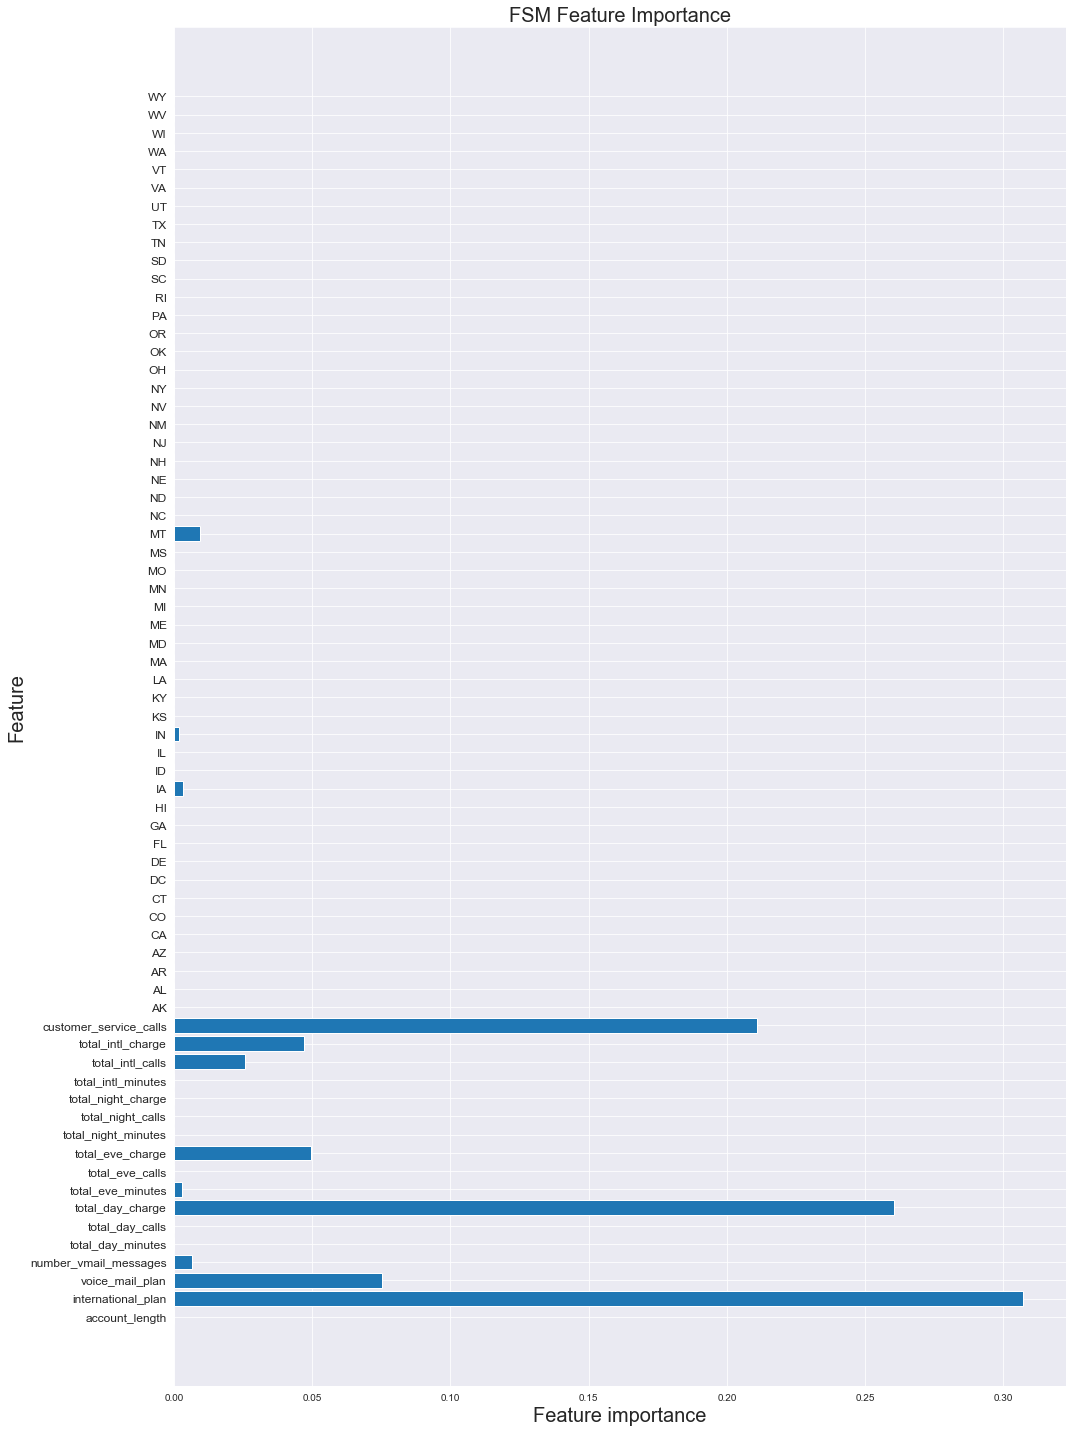

In [223]:
n_features = fsm.n_features_
plt.figure(figsize=(15, 20))
plt.barh(range(n_features), fsm.feature_importances_);
plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 12) 
plt.xlabel('Feature importance', fontsize = 20)
plt.ylabel('Feature', fontsize = 20)
plt.title('FSM Feature Importance', fontsize = 20)
plt.tight_layout()
plt.savefig('figures/fsm_feat_import.png')

We can see from this feature importance graph that there are three features that the model is weighing more heavily:
- `international_plan`
- `total_day_charge`
- `customer_service_calls`

Little to no weight has been given to the states.  

This model leads us to return to our EDA and explore location and these three features to see how churn plays our with these 4 features.

## Return to EDA: Important Features from FSM

Let's first take a look at the feature correlations with churn to see if this matches what we see in our FSM.

In [224]:
# correlations with churn
df.corr().churn.sort_values(ascending = False)

churn                     1.000000
international_plan        0.259852
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
voice_mail_plan          -0.102148
Name: churn, dtype: float64

We find the same results - the three features that were highlighted in our model also are the most highly correlated with churn. 

Let's visualise these three features further.

### International Plan

In [225]:
int_plan_churn = pd.DataFrame(df.groupby(['international_plan'])['churn'].mean())
int_plan_churn

,churn
international_plan,
0,0.114950
1,0.424149


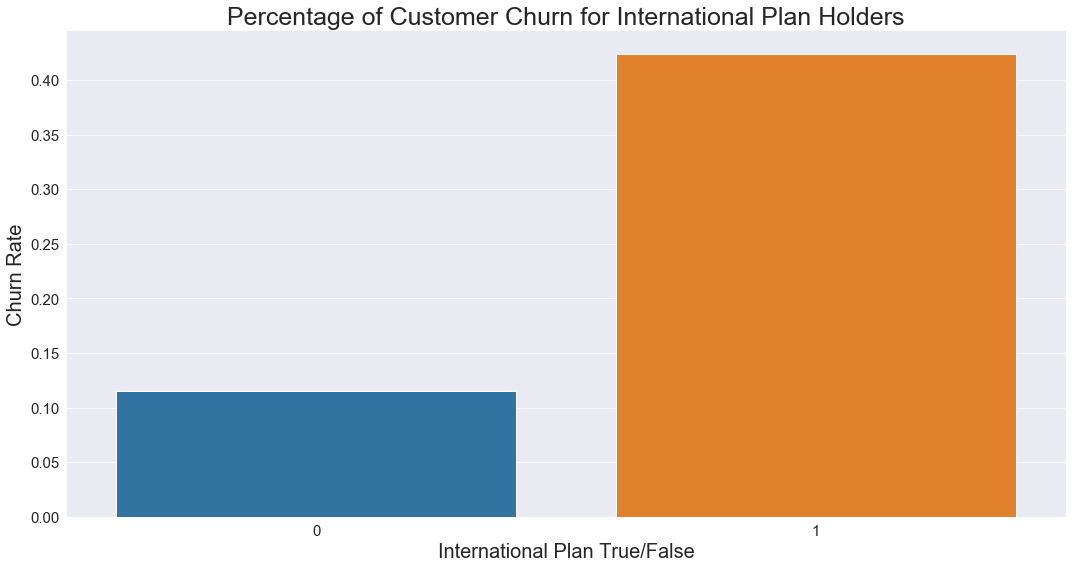

In [226]:
# plot
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1], y = 'churn', data = int_plan_churn, ax = ax)
plt.title('Percentage of Customer Churn for International Plan Holders', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('International Plan True/False', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
plt.savefig('figures/int_plan_churn.png')

So it appears that international plan holders is a deterministic factor of churn.  Roughly 42% of customers with an international plan end up churning.

Further investigation into retention efforts for international plan holders might be a worthwhile effort. 

### Customer Service Calls

Let's visualise in the same way the customer service calls data in relation to churn:

In [227]:
csc = pd.DataFrame(df.groupby(['customer_service_calls'])['churn'].mean())
csc

,churn
customer_service_calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


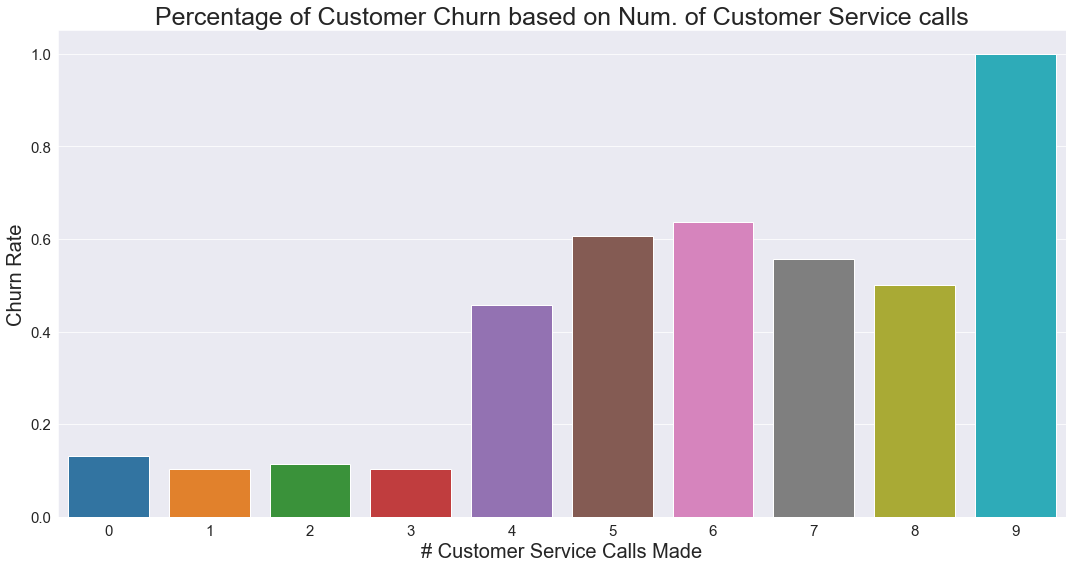

In [228]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y = 'churn', data = csc, ax = ax)
plt.title('Percentage of Customer Churn based on Num. of Customer Service calls', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('# Customer Service Calls Made', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
plt.savefig('figures/cust_serv_call_churn.png')

There appears to be a huge spike in the rate of churn for customers who make 4 or more calls to customer service.  Customers make this many calls to customer service have a churn rate over 40%.  Further investigation should be devoted to looking into the other characteristics of these customers to find out why there was a need to make this many calls to customer service and how the company could better assist these customers.

### Total Day Charge

We saw earlier that total day charge and total day minutes are perfectly correlated.  For this reason, insights found on total day charge would also relate to total day minutes.  One of these columns could be dropped from our model.

Let's view the distribution of this feature to inspect for potential outliers or abnormalities:

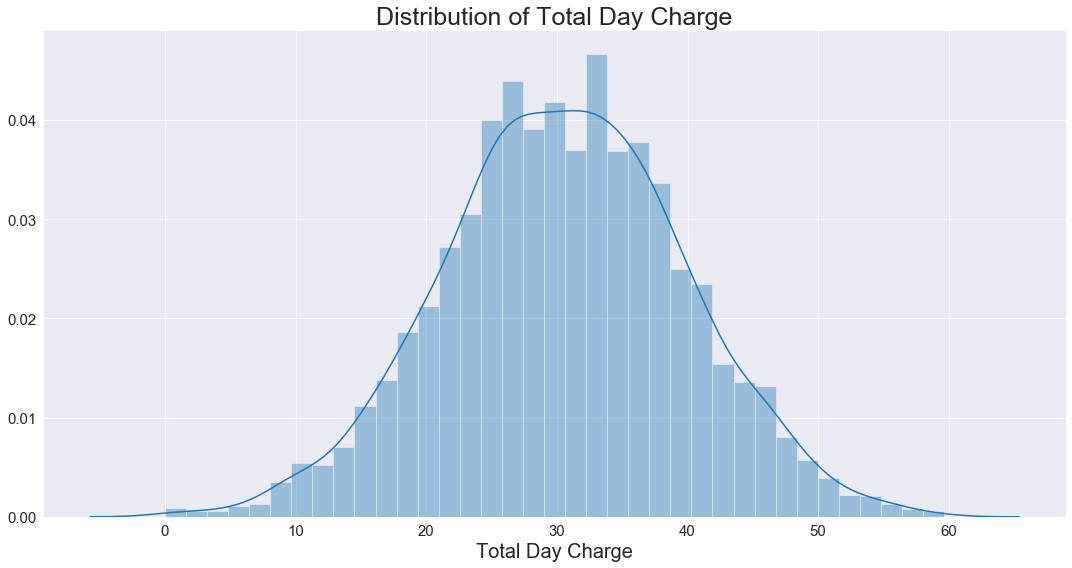

In [229]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Charge', fontsize = 25)
sns.distplot(df.total_day_charge, ax = ax)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Total Day Charge', fontsize = 20)
plt.tight_layout()
plt.savefig('figures/tot_day_charge_dist.png')

This is almost a perfect normal distribution and so we don't detect any unusual activity or outliers for total day charge.

In [230]:
tdc = pd.DataFrame(df.groupby(['total_day_charge'])['churn'].mean())
tdc

,churn
total_day_charge,
0.00,0.5
0.44,0.0
1.33,0.0
1.34,0.0
2.13,0.0
...,...
57.04,1.0
57.36,1.0
58.70,1.0


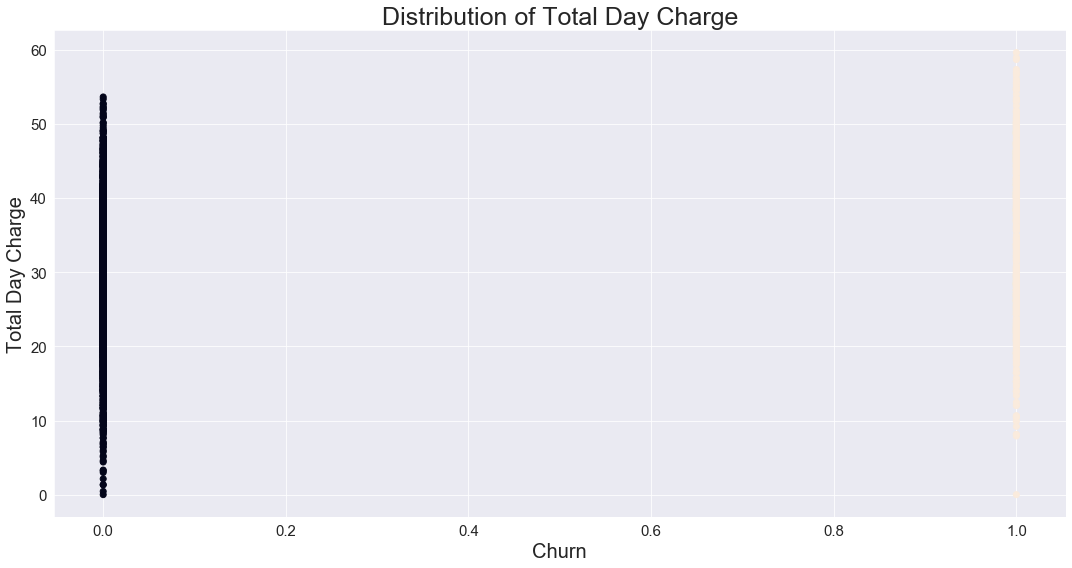

In [231]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Charge', fontsize = 25)
plt.scatter(df.churn, df.total_day_charge, c = df.churn)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Churn', fontsize = 20)
plt.ylabel('Total Day Charge', fontsize = 20)
plt.tight_layout()
sns.set_style('whitegrid')
plt.savefig('figures/tot_day_charg_churn.png')

We can see from this plot here than customers with total day charges of over roughly $55 have a 100% rate of churn.  Perhaps the company could investigate ways to incentivise these particular customers to stay with some added value perks.

### State

Since none of the states were highlighted as important in the FSM, let's investigate to see if there is much of a difference in churn between states or if it is relatively even across the country.

In [232]:
df.groupby(['state'])['churn'].mean().sort_values(ascending = False)

state
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
ND    0.096774
NM    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: churn, dtype: float64

We can see there actually is a fairly diverse range here with a minimum churn in Hawaii of 5.7% and maximum churn in California of 26.5%.  Let's visualise this with a map of the country with this data:

![figures/churn_by_state.png](figures/churn_by_state.png)

Note:  to see the details and code of how this graph was made, see [this notebook](../exploratory/lmc_exploratory_nb/05_state_vis_lc.ipynb).

We can see there are three states that have particularly high churn:  California, New Jersey and Texas.  Further investigation should be done to see what is going on in these high churn states to see what trends might be causing this.

## Model Iterations